In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print(x_data.shape, t_data.shape)

except Exception as err:

    print(str(err))

(759, 8) (759, 1)


In [ ]:
print(x_data[:2])
print(t_data[:2])

s = np.arange(len(x_data))

print(s)

np.random.shuffle(s)

print(s)

x_data = x_data[s]
t_data = t_data[s]

print(x_data[:2])
print(t_data[:2])

[[-0.294118    0.487437    0.180328   -0.292929    0.          0.00149028
  -0.53117    -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  -0.414141    0.         -0.207153
  -0.766866   -0.666667  ]]
[[0.]
 [1.]]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193

In [ ]:
TEST_SPLIT_RATIO = 0.1

test_nums = int(TEST_SPLIT_RATIO*len(x_data))

print('test_nums = ', test_nums)

x_test = x_data[:test_nums]
t_test = t_data[:test_nums]

x_data = x_data[test_nums:]
t_data = t_data[test_nums:]

print(x_data.shape, t_data.shape)
print(x_test.shape, t_test.shape)

test_nums =  75
(684, 8) (684, 1)
(75, 8) (75, 1)


In [ ]:
VAL_SPLIT_RATIO = 0.1

val_nums = int(VAL_SPLIT_RATIO*len(x_data))

print('val_nums = ', val_nums)

x_val = x_data[:val_nums]
t_val = t_data[:val_nums]

x_data = x_data[val_nums:]
t_data = t_data[val_nums:]

print(x_data.shape, t_data.shape)
print(x_val.shape, t_val.shape)

val_nums =  68
(616, 8) (616, 1)
(68, 8) (68, 1)


In [ ]:
# Logistic Regression 을 keras 이용하여 생성

model = Sequential()

# 노드 1개인 출력층 생성
model.add(Dense(t_data.shape[1], 
                input_shape=(x_data.shape[1],),
                activation='sigmoid'))  

In [ ]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=500, validation_data=(x_val, t_val), verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
20/20 - 0s - loss: 0.6533 - accuracy: 0.6429 - val_loss: 0.6895 - val_accuracy: 0.5441
Epoch 2/500
20/20 - 0s - loss: 0.6493 - accuracy: 0.6510 - val_loss: 0.6885 - val_accuracy: 0.5147
Epoch 3/500
20/20 - 0s - loss: 0.6458 - accuracy: 0.6526 - val_loss: 0.6876 - val_accuracy: 0.5147
Epoch 4/500
20/20 - 0s - loss: 0.6429 - accuracy: 0.6526 - val_loss: 0.6868 - val_accuracy: 0.5147
Epoch 5/500
20/20 - 0s - loss: 0.6402 - accuracy: 0.6558 - val_loss: 0.6860 - val_accuracy: 0.5147
Epoch 6/500
20/20 - 0s - loss: 0.6379 - accuracy: 0.6558 - val_loss: 0.6853 - val_accuracy: 0.5147
Epoch 7/500
20/20 - 0s - loss: 0.6356 - accuracy: 0.6640 - val_loss: 0.6845 - val_accuracy: 0.5147
Epoch 8/500
20/20 - 0s - loss: 0.6337 - accuracy: 0.6656 - val_loss: 0.6836 - val_accuracy: 0.5441
Epoch 9/500
20/20 - 0s - loss: 0.6320 - accuracy: 0.6656 - val_loss: 0.6831 - val_accuracy: 0.5441
Epoch 10/500
20/20 - 0s - loss: 0.6301 - accuracy: 0.6672 - val_loss: 0.6818 - val_accuracy: 0.5441
Epoch 11/

20/20 - 0s - loss: 0.5649 - accuracy: 0.6932 - val_loss: 0.6043 - val_accuracy: 0.6324
Epoch 84/500
20/20 - 0s - loss: 0.5644 - accuracy: 0.6932 - val_loss: 0.6035 - val_accuracy: 0.6324
Epoch 85/500
20/20 - 0s - loss: 0.5639 - accuracy: 0.6981 - val_loss: 0.6027 - val_accuracy: 0.6324
Epoch 86/500
20/20 - 0s - loss: 0.5633 - accuracy: 0.6964 - val_loss: 0.6018 - val_accuracy: 0.6324
Epoch 87/500
20/20 - 0s - loss: 0.5627 - accuracy: 0.6981 - val_loss: 0.6007 - val_accuracy: 0.6471
Epoch 88/500
20/20 - 0s - loss: 0.5621 - accuracy: 0.6981 - val_loss: 0.5999 - val_accuracy: 0.6471
Epoch 89/500
20/20 - 0s - loss: 0.5616 - accuracy: 0.6981 - val_loss: 0.5993 - val_accuracy: 0.6471
Epoch 90/500
20/20 - 0s - loss: 0.5610 - accuracy: 0.6981 - val_loss: 0.5985 - val_accuracy: 0.6618
Epoch 91/500
20/20 - 0s - loss: 0.5604 - accuracy: 0.6997 - val_loss: 0.5975 - val_accuracy: 0.6618
Epoch 92/500
20/20 - 0s - loss: 0.5599 - accuracy: 0.7013 - val_loss: 0.5968 - val_accuracy: 0.6618
Epoch 93/500


Epoch 165/500
20/20 - 0s - loss: 0.5310 - accuracy: 0.7435 - val_loss: 0.5542 - val_accuracy: 0.7059
Epoch 166/500
20/20 - 0s - loss: 0.5308 - accuracy: 0.7451 - val_loss: 0.5537 - val_accuracy: 0.7059
Epoch 167/500
20/20 - 0s - loss: 0.5305 - accuracy: 0.7419 - val_loss: 0.5528 - val_accuracy: 0.7059
Epoch 168/500
20/20 - 0s - loss: 0.5302 - accuracy: 0.7468 - val_loss: 0.5523 - val_accuracy: 0.7059
Epoch 169/500
20/20 - 0s - loss: 0.5299 - accuracy: 0.7500 - val_loss: 0.5517 - val_accuracy: 0.7059
Epoch 170/500
20/20 - 0s - loss: 0.5296 - accuracy: 0.7500 - val_loss: 0.5512 - val_accuracy: 0.7059
Epoch 171/500
20/20 - 0s - loss: 0.5294 - accuracy: 0.7484 - val_loss: 0.5509 - val_accuracy: 0.7059
Epoch 172/500
20/20 - 0s - loss: 0.5291 - accuracy: 0.7500 - val_loss: 0.5505 - val_accuracy: 0.7059
Epoch 173/500
20/20 - 0s - loss: 0.5288 - accuracy: 0.7516 - val_loss: 0.5503 - val_accuracy: 0.7059
Epoch 174/500
20/20 - 0s - loss: 0.5286 - accuracy: 0.7516 - val_loss: 0.5499 - val_accurac

Epoch 247/500
20/20 - 0s - loss: 0.5136 - accuracy: 0.7597 - val_loss: 0.5268 - val_accuracy: 0.7206
Epoch 248/500
20/20 - 0s - loss: 0.5135 - accuracy: 0.7597 - val_loss: 0.5266 - val_accuracy: 0.7206
Epoch 249/500
20/20 - 0s - loss: 0.5133 - accuracy: 0.7597 - val_loss: 0.5266 - val_accuracy: 0.7206
Epoch 250/500
20/20 - 0s - loss: 0.5132 - accuracy: 0.7581 - val_loss: 0.5263 - val_accuracy: 0.7206
Epoch 251/500
20/20 - 0s - loss: 0.5130 - accuracy: 0.7581 - val_loss: 0.5261 - val_accuracy: 0.7206
Epoch 252/500
20/20 - 0s - loss: 0.5128 - accuracy: 0.7581 - val_loss: 0.5259 - val_accuracy: 0.7206
Epoch 253/500
20/20 - 0s - loss: 0.5127 - accuracy: 0.7581 - val_loss: 0.5258 - val_accuracy: 0.7206
Epoch 254/500
20/20 - 0s - loss: 0.5126 - accuracy: 0.7581 - val_loss: 0.5255 - val_accuracy: 0.7206
Epoch 255/500
20/20 - 0s - loss: 0.5124 - accuracy: 0.7581 - val_loss: 0.5252 - val_accuracy: 0.7206
Epoch 256/500
20/20 - 0s - loss: 0.5123 - accuracy: 0.7581 - val_loss: 0.5250 - val_accurac

Epoch 329/500
20/20 - 0s - loss: 0.5037 - accuracy: 0.7597 - val_loss: 0.5104 - val_accuracy: 0.7206
Epoch 330/500
20/20 - 0s - loss: 0.5037 - accuracy: 0.7581 - val_loss: 0.5104 - val_accuracy: 0.7206
Epoch 331/500
20/20 - 0s - loss: 0.5036 - accuracy: 0.7597 - val_loss: 0.5103 - val_accuracy: 0.7206
Epoch 332/500
20/20 - 0s - loss: 0.5035 - accuracy: 0.7581 - val_loss: 0.5100 - val_accuracy: 0.7206
Epoch 333/500
20/20 - 0s - loss: 0.5034 - accuracy: 0.7565 - val_loss: 0.5099 - val_accuracy: 0.7206
Epoch 334/500
20/20 - 0s - loss: 0.5033 - accuracy: 0.7581 - val_loss: 0.5099 - val_accuracy: 0.7206
Epoch 335/500
20/20 - 0s - loss: 0.5032 - accuracy: 0.7581 - val_loss: 0.5098 - val_accuracy: 0.7206
Epoch 336/500
20/20 - 0s - loss: 0.5031 - accuracy: 0.7581 - val_loss: 0.5097 - val_accuracy: 0.7206
Epoch 337/500
20/20 - 0s - loss: 0.5030 - accuracy: 0.7581 - val_loss: 0.5094 - val_accuracy: 0.7206
Epoch 338/500
20/20 - 0s - loss: 0.5030 - accuracy: 0.7581 - val_loss: 0.5093 - val_accurac

20/20 - 0s - loss: 0.4977 - accuracy: 0.7565 - val_loss: 0.4995 - val_accuracy: 0.7353
Epoch 411/500
20/20 - 0s - loss: 0.4977 - accuracy: 0.7565 - val_loss: 0.4992 - val_accuracy: 0.7353
Epoch 412/500
20/20 - 0s - loss: 0.4976 - accuracy: 0.7581 - val_loss: 0.4992 - val_accuracy: 0.7353
Epoch 413/500
20/20 - 0s - loss: 0.4976 - accuracy: 0.7581 - val_loss: 0.4992 - val_accuracy: 0.7353
Epoch 414/500
20/20 - 0s - loss: 0.4975 - accuracy: 0.7581 - val_loss: 0.4991 - val_accuracy: 0.7353
Epoch 415/500
20/20 - 0s - loss: 0.4974 - accuracy: 0.7581 - val_loss: 0.4991 - val_accuracy: 0.7353
Epoch 416/500
20/20 - 0s - loss: 0.4974 - accuracy: 0.7565 - val_loss: 0.4989 - val_accuracy: 0.7353
Epoch 417/500
20/20 - 0s - loss: 0.4973 - accuracy: 0.7565 - val_loss: 0.4988 - val_accuracy: 0.7353
Epoch 418/500
20/20 - 0s - loss: 0.4973 - accuracy: 0.7565 - val_loss: 0.4988 - val_accuracy: 0.7353
Epoch 419/500
20/20 - 0s - loss: 0.4972 - accuracy: 0.7581 - val_loss: 0.4988 - val_accuracy: 0.7353
Epoc

Epoch 492/500
20/20 - 0s - loss: 0.4938 - accuracy: 0.7597 - val_loss: 0.4927 - val_accuracy: 0.7353
Epoch 493/500
20/20 - 0s - loss: 0.4937 - accuracy: 0.7597 - val_loss: 0.4926 - val_accuracy: 0.7353
Epoch 494/500
20/20 - 0s - loss: 0.4937 - accuracy: 0.7597 - val_loss: 0.4926 - val_accuracy: 0.7353
Epoch 495/500
20/20 - 0s - loss: 0.4936 - accuracy: 0.7597 - val_loss: 0.4927 - val_accuracy: 0.7353
Epoch 496/500
20/20 - 0s - loss: 0.4936 - accuracy: 0.7597 - val_loss: 0.4925 - val_accuracy: 0.7353
Epoch 497/500
20/20 - 0s - loss: 0.4935 - accuracy: 0.7597 - val_loss: 0.4923 - val_accuracy: 0.7353
Epoch 498/500
20/20 - 0s - loss: 0.4936 - accuracy: 0.7597 - val_loss: 0.4923 - val_accuracy: 0.7353
Epoch 499/500
20/20 - 0s - loss: 0.4935 - accuracy: 0.7597 - val_loss: 0.4921 - val_accuracy: 0.7353
Epoch 500/500
20/20 - 0s - loss: 0.4934 - accuracy: 0.7597 - val_loss: 0.4920 - val_accuracy: 0.7353

Elapsed Time =>  0:00:19.313239


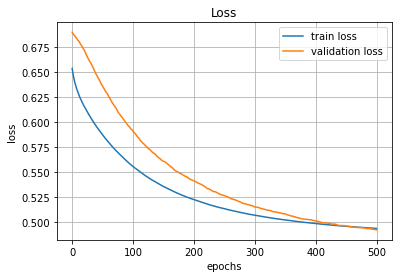

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

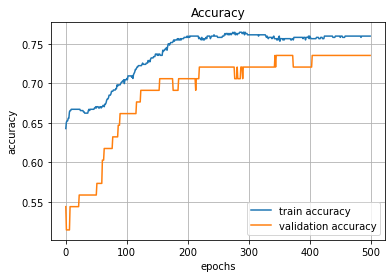

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [ ]:
model.evaluate(x_test, t_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8133


[0.4169781506061554, 0.8133333325386047]